In [1]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import pandas as pd
from keras.applications.resnet50 import preprocess_input
import os
import glob
from shutil import copyfile
from IPython import display
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
## model paths
cat_path = 'model.18-2.48.hdf5'
attr1_path = 'model.12-2.15.hdf5'
attr2_path = 'model.09-2.20.hdf5'  ## change
attr3_path = 'model.30-1.97.hdf5'
attr4_path = 'model.19-2.34.hdf5'
attr5_path = 'model.15-2.47.hdf5'
#img_path = '/home/rakesh/Desktop/CF Dataset/mod/val/Top/Abstract_Asymmetrical_Hem_Top_img_00000008.jpg'

In [3]:
# model_cat = load_model(cat_path )
# model_attr1 = load_model(attr1_path)
# model_attr2 = load_model(attr2_path)
# model_attr3 = load_model(attr3_path)
# model_attr4 = load_model(attr4_path)
# model_attr5 = load_model(attr5_path)

In [4]:
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data

In [5]:
def predict_vector(model,img_data):
    return model.predict(img_data)

#k= model.predict(img_data)

## one time

In [6]:
## load files
## filecopy
source = '/home/rakesh/Desktop/CF Dataset/mod/val/*'
dest = 'image_database/'


# def create_database():
    
#     for folder in glob.glob(source):
#         for i,file_ in enumerate(glob.glob(folder+"/*")):
#             name = file_.split("/")[-1]
#             copyfile(file_, dest+name)
#             if i%1000==0:
#                 print i

    
# create_database()    

In [7]:
vector = []
file_list = sorted(glob.glob(dest+"*"))

print "Files : "+str(len(file_list))

for i in range(0,len(file_list)):
    vector.append([])

Files : 50490


In [8]:
##  category model 
model = load_model(cat_path )

for i,path in enumerate(file_list):
    array = prepare(path)
    feature = predict_vector(model,array)
    p = feature[0].tolist()
    vector[i]+=p
    #display.clear_output(wait=True)
    if i%1000==0:
        print i
    #break

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [9]:
##  attribute
model = load_model(attr1_path )

for i,path in enumerate(file_list):
    array = prepare(path)
    feature = predict_vector(model,array)
    p = feature[0].tolist()
    vector[i]+=p
    #display.clear_output(wait=True)
    if i%1000==0:
        print i
    #break
print "=======================   1   ======================"    
model = load_model(attr2_path )

for i,path in enumerate(file_list):
    array = prepare(path)
    feature = predict_vector(model,array)
    p = feature[0].tolist()
    vector[i]+=p
    #break
    if i%1000==0:
        print i
print "=======================   2   ======================"         
model = load_model(attr3_path )

for i,path in enumerate(file_list):
    array = prepare(path)
    feature = predict_vector(model,array)
    p = feature[0].tolist()
    vector[i]+=p
    #break
    if i%1000==0:
        print i    
model = load_model(attr4_path )
print "=======================   3   ======================" 
for i,path in enumerate(file_list):
    array = prepare(path)
    feature = predict_vector(model,array)
    p = feature[0].tolist()
    vector[i]+=p
    #break
    if i%1000==0:
        print i    
model = load_model(attr5_path )
print "=======================   4   ======================" 
for i,path in enumerate(file_list):
    array = prepare(path)
    feature = predict_vector(model,array)
    p = feature[0].tolist()
    vector[i]+=p
    #break
    if i%1000==0:
        print i
print "=======================   5   ======================" 

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
=======================   1   ======================
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
=======================   2   ======================
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
===============

In [10]:
df = pd.DataFrame({'vector':vector},index = file_list)
df.shape

(50490, 1)

In [11]:
df.to_csv('image_database.csv')

In [13]:
from joblib import dump, load
#from sklearn.externals import joblib
dump(df, 'image_database.joblib') 

['image_database.joblib']

## LOAD IMAGE DATABASE

In [ ]:
from joblib import dump, load
df=load('image_database.joblib')

##   PREDICT

In [17]:
##############  predict  ########################
test_image_path = '1981_Graphic_Ringer_Tee_img_00000014.jpg'
test_vector = []
image_array = prepare(test_image_path)

############# pass through models ##############

model = load_model(cat_path )

feature = predict_vector(model,image_array)
test_vector+= feature[0].tolist()

print ".",
model = load_model(attr1_path )

feature = predict_vector(model,image_array)
test_vector+= feature[0].tolist()

print ".",
model = load_model(attr2_path )

feature = predict_vector(model,image_array)
test_vector+= feature[0].tolist()
print ".",
model = load_model(attr3_path )

feature = predict_vector(model,image_array)
test_vector+= feature[0].tolist()
print ".",
model = load_model(attr4_path )

feature = predict_vector(model,image_array)
test_vector+= feature[0].tolist()
print ".",
model = load_model(attr5_path )

feature = predict_vector(model,image_array)
test_vector+= feature[0].tolist()
print ".",


. . . . . .


In [22]:
#######  search for similar items  ##############


from scipy.spatial.distance import cosine
sim_list =[]

for image in df.index:
    #print df.loc[image]['vector']
    sim = 1-cosine(test_vector,df.loc[image]['vector'])
    
    sim_list.append((sim,image))
 

Populating the interactive namespace from numpy and matplotlib
Input Image


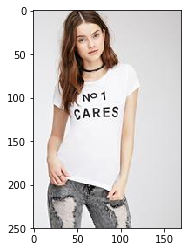


0.9585213381549549


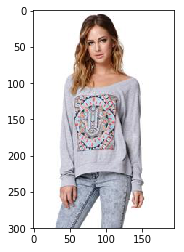


---------------------
0.9474197032931083


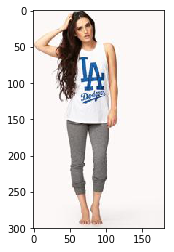


---------------------
0.9473224672226631


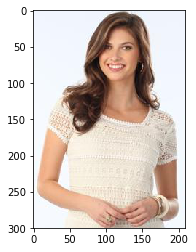


---------------------
0.9471914754152957


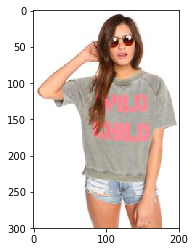


---------------------


In [31]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TOP = 5

print "Input Image"

img=mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.show()

print "======================================\n"

sorted_sim_list = list(reversed(sorted(sim_list)))

for v,im in sorted_sim_list[1:TOP]:
    print v
    img=mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()
    print "\n---------------------"
    